# 06/06/2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Regularsation
# to overcome the outfitting problem, thus used regularisation
# or to reduce overfitting problem then used regularisation
# Regularisation means to add some external error on training time
# There are two types of regularisation
# LASO Regularisation means l1 Regularisation
# RIDGE Regalarisaion means l2 Regaularisation

# in laso Regularisation
# training error (RSS)+ lambda*external error
# RSS+ lambda*sum of (absoluteof slope)
# in laso, the values of lambda in between 200-1000

# in Ridge Regularisation:-
# training error (RSS)+ lambda * external error
# RSS+lambda * sum of (square of slope)
# in Ridge, the value of lambda between 0-50

# lambda is also called hyper parameter
# lambda or hyperparameter decided the how much error add during training time


In [3]:
#Overfitting Means 
#First train model with 70 % and check training score 
#After train test mmodel with 30 % data and check testing score 
#if training score > testing score (Note training score is always > testing score but difference more than 5)
#Then consider overfitting the model otherwise not a overfit

In [4]:
df=pd.read_csv("Automobile_data.csv")

In [5]:
df.head()

symboling normalized-losses         make fuel-type   body-style  \
0          3                 ?  alfa-romero       gas  convertible   
1          3                 ?  alfa-romero       gas  convertible   
2          1                 ?  alfa-romero       gas    hatchback   
3          2               164         audi       gas        sedan   
4          2               164         audi       gas        sedan   

  drive-wheels engine-location  width  height engine-type  engine-size  \
0          rwd           front   64.1    48.8        dohc          130   
1          rwd           front   64.1    48.8        dohc          130   
2          rwd           front   65.5    52.4        ohcv          152   
3          fwd           front   66.2    54.3         ohc          109   
4          4wd           front   66.4    54.3         ohc          136   

  horsepower  city-mpg  highway-mpg  price  
0        111        21           27  13495  
1        111        21           27  16500  
2        154        19           26  16500  
3        102        24           30  13950  
4        115        18           22  17450

In [6]:
# how many rows and columns are present
df.shape

(205, 15)

In [7]:
# check how many null values are present
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [8]:
# checking the data types
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [9]:
df["normalized-losses"].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [10]:
df["normalized-losses"].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [11]:
df[df["normalized-losses"]=="?"]

symboling normalized-losses           make fuel-type   body-style  \
0            3                 ?    alfa-romero       gas  convertible   
1            3                 ?    alfa-romero       gas  convertible   
2            1                 ?    alfa-romero       gas    hatchback   
5            2                 ?           audi       gas        sedan   
7            1                 ?           audi       gas        wagon   
9            0                 ?           audi       gas    hatchback   
14           1                 ?            bmw       gas        sedan   
15           0                 ?            bmw       gas        sedan   
16           0                 ?            bmw       gas        sedan   
17           0                 ?            bmw       gas        sedan   
43           0                 ?          isuzu       gas        sedan   
44           1                 ?          isuzu       gas        sedan   
45           0                 ?          isuzu       gas        sedan   
46           2                 ?          isuzu       gas    hatchback   
48           0                 ?         jaguar       gas        sedan   
49           0                 ?         jaguar       gas        sedan   
63           0                 ?          mazda    diesel        sedan   
66           0                 ?          mazda    diesel        sedan   
71          -1                 ?  mercedes-benz       gas        sedan   
73           0                 ?  mercedes-benz       gas        sedan   
74           1                 ?  mercedes-benz       gas      hardtop   
75           1                 ?        mercury       gas    hatchback   
82           3                 ?     mitsubishi       gas    hatchback   
83           3                 ?     mitsubishi       gas    hatchback   
84           3                 ?     mitsubishi       gas    hatchback   
109          0                 ?         peugot       gas        wagon   
110          0                 ?         peugot    diesel        wagon   
113          0                 ?         peugot       gas        wagon   
114          0                 ?         peugot    diesel        wagon   
124          3                 ?       plymouth       gas    hatchback   
126          3                 ?        porsche       gas      hardtop   
127          3                 ?        porsche       gas      hardtop   
128          3                 ?        porsche       gas  convertible   
129          1                 ?        porsche       gas    hatchback   
130          0                 ?        renault       gas        wagon   
131          2                 ?        renault       gas    hatchback   
181         -1                 ?         toyota       gas        wagon   
189          3                 ?     volkswagen       gas  convertible   
191          0                 ?     volkswagen       gas        sedan   
192          0                 ?     volkswagen    diesel        sedan   
193          0                 ?     volkswagen       gas        wagon   

    drive-wheels engine-location  width  height engine-type  engine-size  \
0            rwd           front   64.1    48.8        dohc          130   
1            rwd           front   64.1    48.8        dohc          130   
2            rwd           front   65.5    52.4        ohcv          152   
5            fwd           front   66.3    53.1         ohc          136   
7            fwd           front   71.4    55.7         ohc          136   
9            4wd           front   67.9    52.0         ohc          131   
14           rwd           front   66.9    55.7         ohc          164   
15           rwd           front   66.9    55.7         ohc          209   
16           rwd           front   67.9    53.7         ohc          209   
17           rwd           front   70.9    56.3         ohc          209   
43           rwd           front   61.8    53.5         ohc 

In [12]:
df["normalized-losses"].replace("?",np.nan,inplace=True)

In [13]:
df["normalized-losses"]=df["normalized-losses"].astype("float")
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [14]:
df["horsepower"].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [15]:
df["horsepower"].replace("?",np.nan,inplace=True)

In [16]:
df["horsepower"]=df["normalized-losses"].astype("float")
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [17]:
m=df['normalized-losses'].mean()
df['horsepower'].fillna(m,inplace=True)

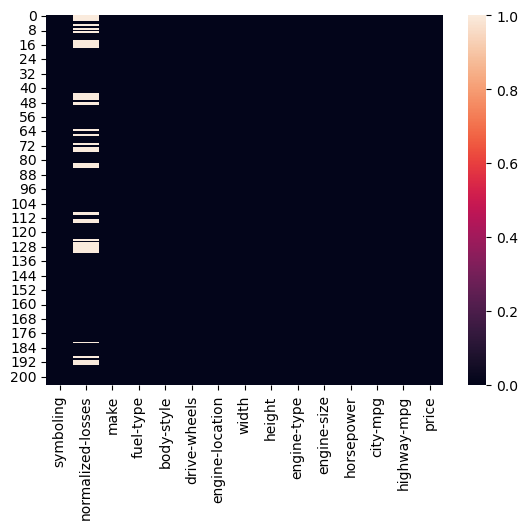

In [18]:
sns.heatmap(df.isnull())
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.2+ KB


In [20]:
df.describe(include=object)

make fuel-type body-style drive-wheels engine-location engine-type
count      205       205        205          205             205         205
unique      22         2          5            3               2           7
top     toyota       gas      sedan          fwd           front         ohc
freq        32       185         96          120             202         148

In [21]:
df.sample(5)

symboling  normalized-losses     make fuel-type   body-style  \
91           1              128.0   nissan       gas        sedan   
58           3              150.0    mazda       gas    hatchback   
140          2               83.0   subaru       gas    hatchback   
203         -1               95.0    volvo    diesel        sedan   
128          3                NaN  porsche       gas  convertible   

    drive-wheels engine-location  width  height engine-type  engine-size  \
91           fwd           front   63.8    54.5         ohc           97   
58           rwd           front   65.7    49.6       rotor           80   
140          4wd           front   63.8    55.7        ohcf          108   
203          rwd           front   68.9    55.5         ohc          145   
128          rwd            rear   65.0    51.6        ohcf          194   

     horsepower  city-mpg  highway-mpg  price  
91        128.0        31           37   6649  
58        150.0        16           23  15645  
140        83.0        26           31   7603  
203        95.0        26           27  22470  
128       122.0        17           25  37028

In [22]:
## Lable encoder : - 
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
df_cat = df.select_dtypes(object)
df_cat.dtypes

make               object
fuel-type          object
body-style         object
drive-wheels       object
engine-location    object
engine-type        object
dtype: object

In [25]:
df_num = df.select_dtypes(["int64","float64"])
df_num.dtypes

symboling              int64
normalized-losses    float64
width                float64
height               float64
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [26]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [27]:
df_cat.dtypes

make               int32
fuel-type          int32
body-style         int32
drive-wheels       int32
engine-location    int32
engine-type        int32
dtype: object

In [29]:
df_new = pd.concat([df_cat,df_num],axis = 1)
df_new.head()

make  fuel-type  body-style  drive-wheels  engine-location  engine-type  \
0     0          1           0             2                0            0   
1     0          1           0             2                0            0   
2     0          1           2             2                0            5   
3     1          1           3             1                0            3   
4     1          1           3             0                0            3   

   symboling  normalized-losses  width  height  engine-size  horsepower  \
0          3                NaN   64.1    48.8          130       122.0   
1          3                NaN   64.1    48.8          130       122.0   
2          1                NaN   65.5    52.4          152       122.0   
3          2              164.0   66.2    54.3          109       164.0   
4          2              164.0   66.4    54.3          136       164.0   

   city-mpg  highway-mpg  price  
0        21           27  13495  
1        21           27  16500  
2        19           26  16500  
3        24           30  13950  
4        18           22  17450